# Lesson 1b: Basic Neural Network with Keras

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

## Imports

In [2]:
%matplotlib inline
from IPython.display import SVG

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils.vis_utils import model_to_dot
import math
import numpy as np

import matplotlib.pyplot as plt

## Create dataset for the logical XOR function

In [3]:
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0, 
                   1, 
                   1, 
                   0])

## Build the neural net model

In [20]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid', kernel_initializer='glorot_normal', 
                kernel_regularizer=l2(0.0001)))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Question 1: 
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below. 

The keras model that we are configuring, has two units per layer and two units as input. From the combination of the units (2x2) we have 4 parameters and because each unit in the dense layer contains a bias we add an extra 2 parameters. Giving us a total of 6.

## Add another layer

In [22]:
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Question 2: 
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent? 

By adding a dense layer of 1, we increased the number of configurable parameters to 9. 2x2 parameters from the input to first layer plus 2x1 from the first layer to the output, giving us a total of 6. And we should add three more to take into account for the bias of the three units from the two dense layers.

## Visualize the model

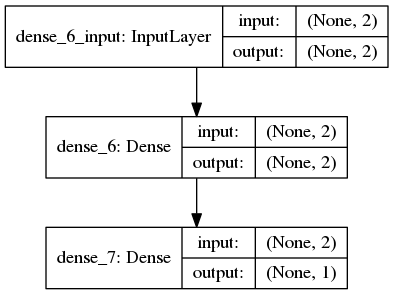

In [24]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Train the model

In [25]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Modify the steps per epoch, number of epochs, etc. below as needed. The goal should be 100% accuracy for the XOR data.

In [26]:
model.fit(data_X, data_y,
          steps_per_epoch=500,
          epochs=7)

Epoch 1/7
500/500 [==============================] - 2s 3ms/step - loss: 0.2520 - accuracy: 0.5640
Epoch 2/7
500/500 [==============================] - 2s 3ms/step - loss: 0.2493 - accuracy: 0.5895
Epoch 3/7
500/500 [==============================] - 2s 3ms/step - loss: 0.2385 - accuracy: 0.7500
Epoch 4/7
500/500 [==============================] - 2s 3ms/step - loss: 0.2186 - accuracy: 0.7500
Epoch 5/7
500/500 [==============================] - 2s 3ms/step - loss: 0.2010 - accuracy: 0.7500
Epoch 6/7
500/500 [==============================] - 2s 3ms/step - loss: 0.1642 - accuracy: 0.7980
Epoch 7/7
500/500 [==============================] - 2s 3ms/step - loss: 0.1152 - accuracy: 1.0000


# Run the trained model on the dataset.

In [27]:
model.predict(data_X)

array([[0.30134347],
       [0.62341654],
       [0.78931355],
       [0.27952123]], dtype=float32)

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

The performance was great, there is a clear decision boundary between the two possible cases fitting correctly the XOR dataset.

# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [33]:
for layer in model.layers:
    print(layer.name)
    for weight in layer.get_weights():
        print(weight)

dense_6
[[ 2.6938603  5.1011496]
 [-2.9039934 -4.8332872]]
[-1.5053993  3.0840595]
dense_7
[[ 2.5382757]
 [-3.2078352]]
[1.7655153]
